<a href="https://colab.research.google.com/github/vault5673/K-Nearest-Neighbors-KNN-Classification/blob/main/K_Nearest_Neighbors_(KNN)_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

In [3]:
# Load dataset
df = pd.read_csv("Iris.csv")
X = df.drop(columns=['Id', 'Species'])
y = df['Species']

In [4]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [6]:
# Experiment with different K values
k_values = list(range(1, 11))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k} -> Accuracy: {acc:.4f}")

K=1 -> Accuracy: 0.9778
K=2 -> Accuracy: 0.9778
K=3 -> Accuracy: 1.0000
K=4 -> Accuracy: 0.9778
K=5 -> Accuracy: 1.0000
K=6 -> Accuracy: 1.0000
K=7 -> Accuracy: 1.0000
K=8 -> Accuracy: 1.0000
K=9 -> Accuracy: 1.0000
K=10 -> Accuracy: 1.0000


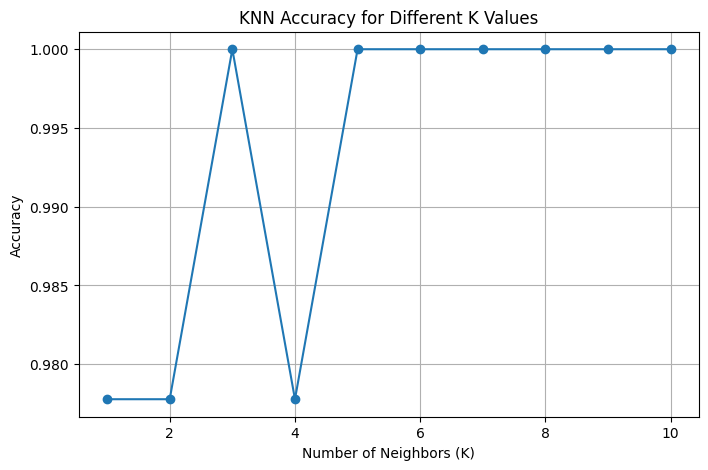

In [7]:
# Plot accuracy vs K
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.title("KNN Accuracy for Different K Values")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


Best K: 3
Confusion Matrix:


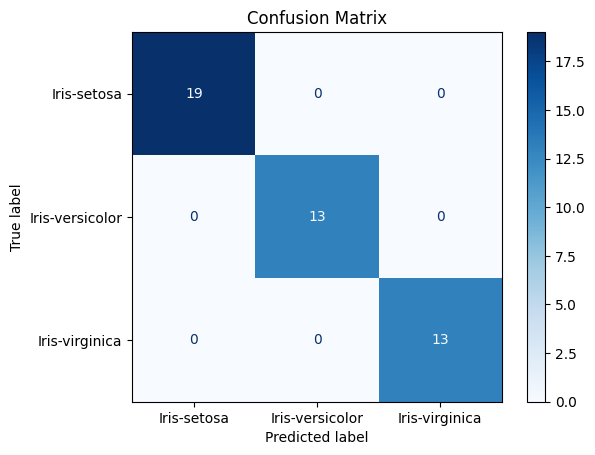

In [8]:
# Final model and evaluation
best_k = k_values[np.argmax(accuracies)]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f"\nBest K: {best_k}")
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [9]:
# Visualize decision boundary using first two features
def plot_decision_boundary(X, y, model, title):
    X = X[:, :2]  # Use only first two features for 2D plot
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = pd.factorize(Z)[0]
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='dark')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


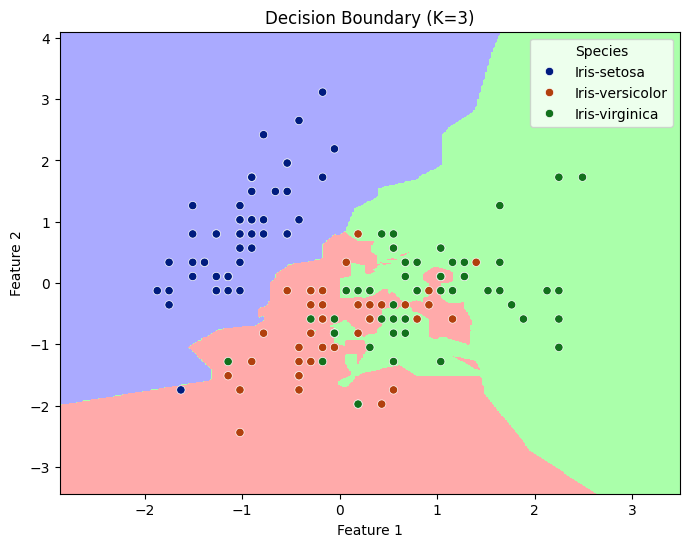

In [10]:
# Train a new model on 2D feature space and visualize
knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(X_scaled[:, :2], y)
plot_decision_boundary(X_scaled, y, knn_2d, f"Decision Boundary (K={best_k})")